In [1]:
from skimage import data
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
data_dir = './drive/My Drive/Colab Notebooks/sample_data/ImgData/'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


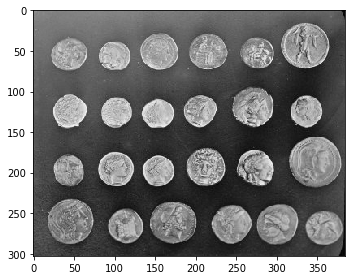

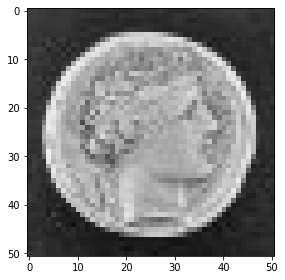

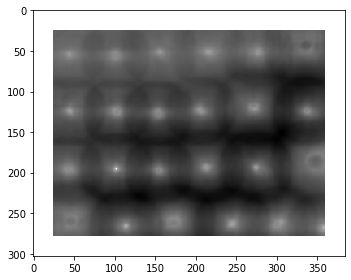

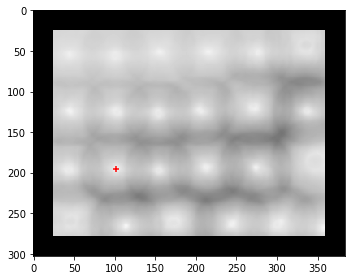

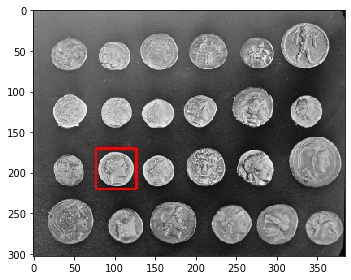

In [3]:
########################
#演習１
from skimage import io
import matplotlib.pyplot as plt
# 画像の読み込み
coins = io.imread(data_dir + 'coins1.tif')
template = io.imread(data_dir + 'coin_template.tif')

#画像の確認
io.imshow(coins)
plt.show()

io.imshow(template)
plt.show()

#画像サイズの取得
N,M = coins.shape # 全体画像のサイズ
wx,wy = template.shape # template画像のサイズ
hwx = int((wx-1)/2) # template画像の幅（中心から端までの距離）
hwy = int((wy-1)/2) # template画像の幅（中心から端までの距離）

D = np.zeros(coins.shape) #距離画像
S = np.zeros(coins.shape) #類似度画像
a = template.reshape([template.size]) # template画像(一次元配列に変換)
a = a.astype(np.float64)
for i in range(hwx,N-hwx):
    for j in range(hwy,M-hwy):
        tmp = coins[i-hwx:i+hwx+1,j-hwy:j+hwy+1] # 全体画像からの切り取り
        b = tmp.reshape([tmp.size]) # ベクトル化
        b = b.astype(np.float64) # 型を実数に変更
        dis = np.linalg.norm(a-b) # 距離を算出
        sim = np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)) #類似度を計算
        D[i,j] = dis # 距離マップの画素(i,j)に距離dを代入
        S[i,j] = sim # 類似度マップの画素(i,j)に類似度simを代入


# visualization
D = D/np.max(D) #正規化
io.imshow(1-D)
io.show()

S2 = (S-np.min(S))/(np.max(S)-np.min(S)) #正規化
S2[S2<0] = 0
io.imshow(S2)

# find the maximum response point and visulization
from skimage.color import gray2rgb
iy,ix = np.unravel_index(S.argmax(), S.shape) # maximum response point
io.imshow(S2)
plt.scatter(ix,iy,c='red',marker='+')
plt.show()

#　赤枠を記載（細いと見えないので太めに表示）
from skimage.color import gray2rgb
im = gray2rgb(coins)
im[iy-hwy,ix-hwx:ix+hwx,:] = [255,0,0]
im[iy+hwy,ix-hwx:ix+hwx,:] = [255,0,0]
im[iy-hwy:iy+hwy,ix-hwx,:] = [255,0,0]
im[iy-hwy:iy+hwy,ix+hwx,:] = [255,0,0]
im[iy-hwy-1,ix-hwx:ix+hwx,:] = [255,0,0]
im[iy+hwy-1,ix-hwx:ix+hwx,:] = [255,0,0]
im[iy-hwy:iy+hwy,ix-hwx-1,:] = [255,0,0]
im[iy-hwy:iy+hwy,ix+hwx-1,:] = [255,0,0]
im[iy-hwy+1,ix-hwx:ix+hwx,:] = [255,0,0]
im[iy+hwy+1,ix-hwx:ix+hwx,:] = [255,0,0]
im[iy-hwy:iy+hwy,ix-hwx+1,:] = [255,0,0]
im[iy-hwy:iy+hwy,ix+hwx+1,:] = [255,0,0]
io.imshow(im)
plt.show()


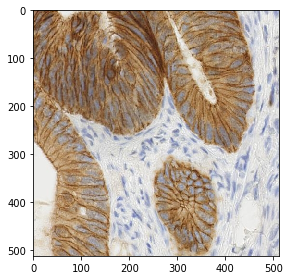

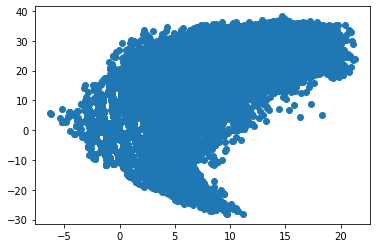

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


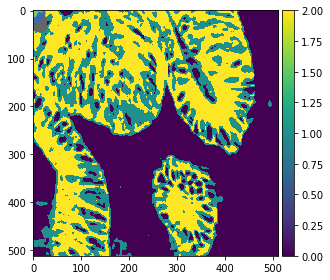

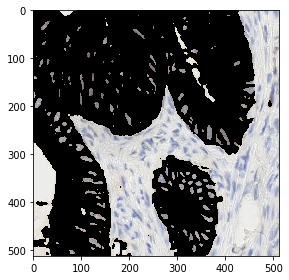

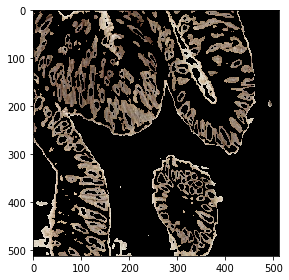

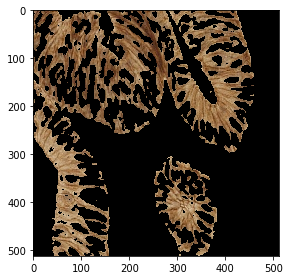

In [4]:
########################
#演習２
from skimage import data
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

data_dir = './drive/My Drive/Colab Notebooks/sample_data/ImgData/'
# skimage.dataから画像を読み込み
he = data.immunohistochemistry()
io.imshow(he)
plt.show()

# L*a*b色空間へ変換
from skimage import color
helab = color.rgb2lab(he)
N, M, _ = helab.shape

# a, bを取り出す
a = helab[:,:,1]
b = helab[:,:,2]
a = a.reshape(a.size)
b = b.reshape(b.size)
ab = []
for i in range(len(a)):
    ab.append([a[i],b[i]])
ab = np.array(ab)

# scattering
plt.scatter(ab[:,0],ab[:,1])
plt.show()

# cluster 数
K = 3

# 初期化: random値の範囲決定
vlist = ab
CList = np.c_[np.random.rand(K,2)]
orgCList = CList

# k-means clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
# cluster 数
K = 3
vlist = ab
km_model = KMeans(n_clusters=K) #K=3のkmeansモデルの初期化
km_model.fit(vlist) #実際にデータをクラスタリング

km_model.cluster_centers_ # クラスタの中心たち

labels=km_model.labels_ # 各データがどのクラスタかが入っている

plt.scatter(vlist[:,0], vlist[:,1], c=labels,cmap=cm.Accent)
    
# 色でセグメント化するイメージの作成
labels = km_model.labels_
pixelLabels = labels.reshape(N,M)
io.imshow(pixelLabels)
plt.show()

# cluster1
he = data.immunohistochemistry()
c = he
c[pixelLabels!=0] = 0
io.imshow(c)
plt.show()

# cluster2
he = data.immunohistochemistry()
c = he
c[pixelLabels!=1] = 0
io.imshow(c)
plt.show()

# cluster3
he = data.immunohistochemistry()
c = he
c[pixelLabels!=2] = 0
io.imshow(c)
plt.show()



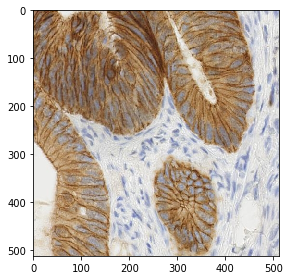

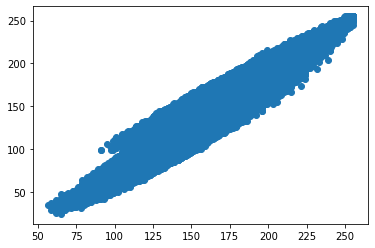

[[134.86623752 100.86346558  69.92371256]
 [169.71109842 147.56256408 126.53129369]
 [215.91923507 214.9749481  215.12424146]]


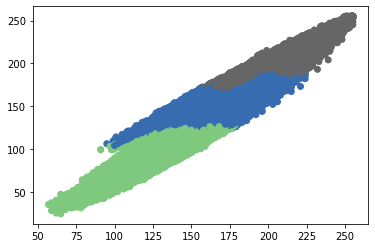

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


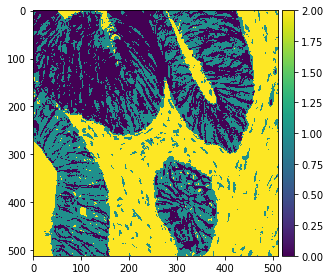

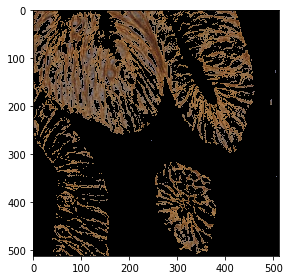

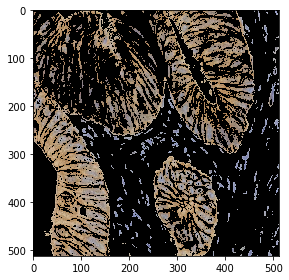

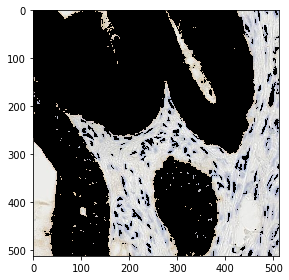

In [5]:
########################
#演習２ (R,G,B)空間
from skimage import data
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

data_dir = './drive/My Drive/Colab Notebooks/sample_data/ImgData/'
# skimage.dataから画像を読み込み
he = data.immunohistochemistry()
io.imshow(he)
plt.show()

N, M, _ = helab.shape
r = he[:,:,0]
g = he[:,:,1]
b = he[:,:,2]
r = r.reshape(r.size)
g = g.reshape(g.size)
b = b.reshape(b.size)
rgb = []
for i in range(len(a)):
    rgb.append([r[i],g[i],b[i]])
rgb = np.array(rgb)

# scattering
plt.scatter(rgb[:,0],rgb[:,1])
plt.show()

# cluster 数
K = 3

# 初期化: random値の範囲決定
vlist = rgb
CList = np.c_[np.random.rand(K,2)]
orgCList = CList

# k-means clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
# cluster 数
K = 3
km_model = KMeans(n_clusters=K) #K=3のkmeansモデルの初期化
km_model.fit(vlist) #実際にデータをクラスタリング

print(km_model.cluster_centers_) # クラスタの中心たち

labels=km_model.labels_ # 各データがどのクラスタかが入っている

plt.scatter(vlist[:,0], vlist[:,1], c=labels,cmap=cm.Accent)
plt.show()
    
# 色でセグメント化するイメージの作成
labels = km_model.labels_
pixelLabels = labels.reshape(N,M)
io.imshow(pixelLabels)
plt.show()

# cluster0
he = data.immunohistochemistry()
c = he
c[pixelLabels!=0] = 0
io.imshow(c)
plt.show()

# cluster1
he = data.immunohistochemistry()
c = he
c[pixelLabels!=1] = 0
io.imshow(c)
plt.show()

# cluster2
he = data.immunohistochemistry()
c = he
c[pixelLabels!=2] = 0
io.imshow(c)
plt.show()


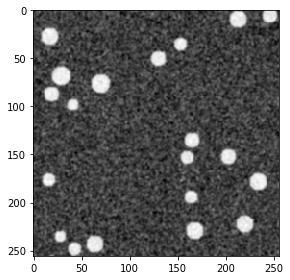

(256, 256)


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


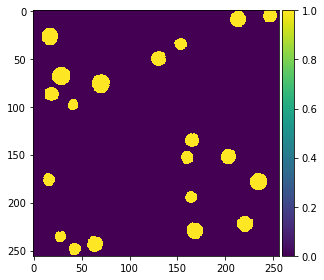

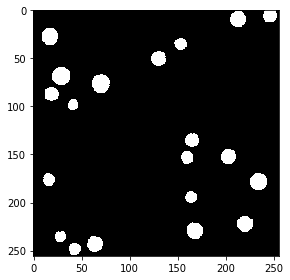

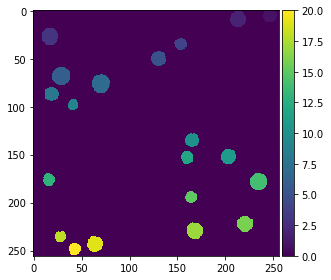

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(256, 256)


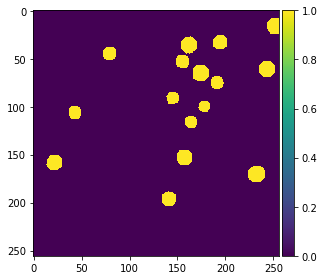

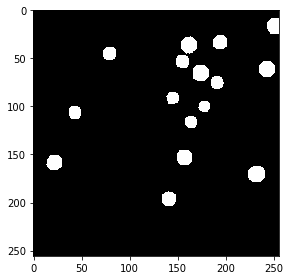

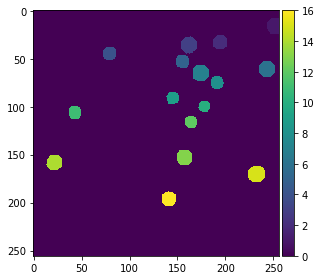

[165, 236, 242, 129, 179, 289, 284, 179, 101, 180, 184, 133, 132, 237, 132, 234, 233, 100, 232, 132]
[184, 197, 250, 150, 150, 249, 249, 152, 150, 107, 151, 150, 201, 198, 251, 202]
coins1:
 mean:186.65, var:3253.8275
coins2:
 mean:186.9375 , var:1925.05859375


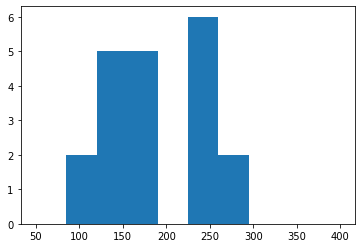

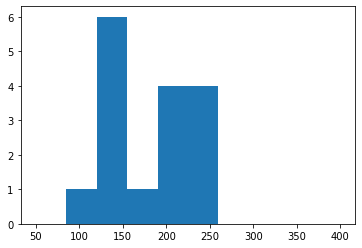

-0.01661013785417041
0.9868447914560321


In [6]:
########################
#演習３
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

#画像読み込み
data_dir = './drive/My Drive/Colab Notebooks/sample_data/ImgData/'
im1 = io.imread(data_dir + 'particles1.tif')
im2 = io.imread(data_dir + 'particles2.tif')

io.imshow(im1)
plt.show()

nrows, ncols = im1.shape

markers = np.zeros_like(im1)
markers[im1 > 170] = 1 # 閾値170以上を取り出す
print(markers.shape)
io.imshow(markers)
plt.show()

from scipy import ndimage as ndi
segmentation = ndi.binary_fill_holes(markers) # Fil holes
io.imshow(segmentation)
plt.show()

labeled_im1, _ = ndi.label(segmentation) # Label all coins one by one

io.imshow(labeled_im1)
plt.show()

## particles2.tif
markers2 = np.zeros_like(im2)
markers2[im2 > 200] = 1 # 閾値200以上を取り出す
print(markers2)
print(markers2.shape)
io.imshow(markers2)
plt.show()

segmentation2 = ndi.binary_fill_holes(markers2) # Fil holes
io.imshow(segmentation2)
plt.show()

labeled_im2, _ = ndi.label(segmentation2) # Label all coins one by one

io.imshow(labeled_im2)
plt.show()

## size を測定
N = np.max(labeled_im1)
sizeList1 = []
sizeTh = 50
for i in range(1,N+1):
    ix,iy = np.where( labeled_im1 == i ) # 各ラベルの画素数をカウント
    if len(ix)<sizeTh: # size(画素数)が50より小さければ無視
        continue
    sizeList1.append(len(ix))

N = np.max(labeled_im2)
sizeList2 = []
for i in range(1,N+1):
    ix,iy = np.where( labeled_im2 == i ) # 各ラベルの画素数をカウント
    if len(ix)<sizeTh: # size(画素数)が50より小さければ無視
        continue
    sizeList2.append(len(ix))

print(sizeList1)
print(sizeList2)
# mean and variance
print('coins1:\n mean:{}, var:{}'.format(np.mean(sizeList1),np.var(sizeList1)));
print('coins2:\n mean:{} , var:{}'.format(np.mean(sizeList2),np.var(sizeList2)));


# histogram
plt.hist(sizeList1,range=[50,400])
plt.show()
plt.hist(sizeList2,range=[50,400])
plt.show()
    

## t 検定
from scipy import stats
t, p = stats.ttest_ind(sizeList1, sizeList2,equal_var=False)
print(t)
print(p)

